### Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Load the dataset

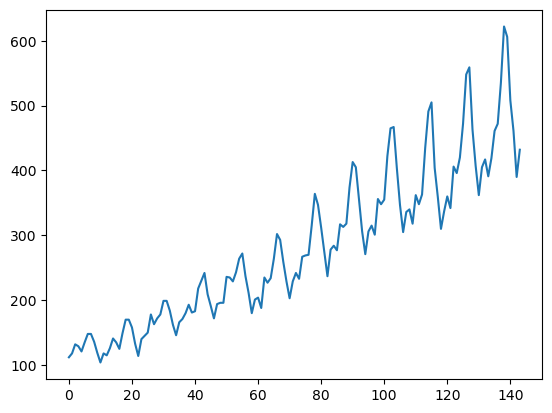

In [3]:
dataframe = pd.read_csv('AirPassengers.csv', usecols=[1])
plt.plot(dataframe)

In [4]:
#Convert pandas dataframe to numpy array
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float

### Normalization
- Normalization is optional but recommended for neural network as certain 
- activation functions are sensitive to magnitude of numbers. 

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

### Splitting the data into train and test
- We cannot use random way of splitting dataset into train and test as
- the sequence of events is important for time series.
- So let us take first 60% values for train and the remaining 1/3 for testing

In [6]:
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

- We cannot fit the model like we normally do for image processing where we have
- X and Y. We need to transform our data into something that looks like X and Y values.
- This way it can be trained on a sequence rather than indvidual datapoints. 
- Let us convert into n number of columns for X where we feed sequence of numbers
- then the final column as Y where we provide the next number in the sequence as output.
- So let us convert an array of values into a dataset matrix
- seq_size is the number of previous time steps to use as 
- input variables to predict the next time period.

- creates a dataset where X is the number of passengers at a given time (t, t-1, t-2...) 
- and Y is the number of passengers at the next time (t + 1).

In [7]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

In [8]:
seq_size = 10 # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [9]:
#Compare trainX and dataset. You can see that X= values at t, t+1 and t+2
#whereas Y is the value that follows, t+3 (since our sequence size is 3)

print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))

Shape of training set: (84, 10)
Shape of test set: (38, 10)


In [10]:
#Input dimensions are... (N x seq_size)
print('Build deep model...')
# create and fit dense model
model = Sequential()
model.add(Dense(64, input_dim=seq_size, activation='relu')) #12
model.add(Dense(32, activation='relu'))  #8
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
print(model.summary()) 

Build deep model...


C:\Users\Bhuvanesh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Epoch 1/100
3/3 - 2s - 561ms/step - loss: 0.0328 - mae: 0.1517 - val_loss: 0.0893 - val_mae: 0.2687
Epoch 2/100
3/3 - 0s - 31ms/step - loss: 0.0115 - mae: 0.0828 - val_loss: 0.0273 - val_mae: 0.1223
Epoch 3/100
3/3 - 0s - 29ms/step - loss: 0.0046 - mae: 0.0536 - val_loss: 0.0177 - val_mae: 0.1130
Epoch 4/100
3/3 - 0s - 26ms/step - loss: 0.0050 - mae: 0.0578 - val_loss: 0.0251 - val_mae: 0.1373
Epoch 5/100
3/3 - 0s - 25ms/step - loss: 0.0066 - mae: 0.0665 - val_loss: 0.0272 - val_mae: 0.1446
Epoch 6/100
3/3 - 0s - 29ms/step - loss: 0.0065 - mae: 0.0658 - val_loss: 0.0227 - val_mae: 0.1302
Epoch 7/100
3/3 - 0s - 22ms/step - loss: 0.0050 - mae: 0.0573 - val_loss: 0.0174 - val_mae: 0.1119
Epoch 8/100
3/3 - 0s - 23ms/step - loss: 0.0039 - mae: 0.0518 - val_loss: 0.0156 - val_mae: 0.1031
Epoch 9/100
3/3 - 0s - 25ms/step - loss: 0.0034 - mae: 0.0476 - val_loss: 0.0168 - val_mae: 0.0982
Epoch 10/100
3/3 - 0s - 27ms/step - loss: 0.0037 - mae: 0.0466 - val_loss: 0.0174 - val_mae: 0.0968
Epoch 11

Epoch 82/100
3/3 - 0s - 25ms/step - loss: 4.6700e-04 - mae: 0.0180 - val_loss: 0.0019 - val_mae: 0.0370
Epoch 83/100
3/3 - 0s - 25ms/step - loss: 4.6454e-04 - mae: 0.0179 - val_loss: 0.0023 - val_mae: 0.0411
Epoch 84/100
3/3 - 0s - 24ms/step - loss: 4.4216e-04 - mae: 0.0176 - val_loss: 0.0020 - val_mae: 0.0373
Epoch 85/100
3/3 - 0s - 25ms/step - loss: 4.3896e-04 - mae: 0.0174 - val_loss: 0.0019 - val_mae: 0.0361
Epoch 86/100
3/3 - 0s - 34ms/step - loss: 4.5214e-04 - mae: 0.0175 - val_loss: 0.0020 - val_mae: 0.0371
Epoch 87/100
3/3 - 0s - 30ms/step - loss: 4.3007e-04 - mae: 0.0173 - val_loss: 0.0024 - val_mae: 0.0415
Epoch 88/100
3/3 - 0s - 24ms/step - loss: 4.2400e-04 - mae: 0.0172 - val_loss: 0.0019 - val_mae: 0.0360
Epoch 89/100
3/3 - 0s - 26ms/step - loss: 4.1946e-04 - mae: 0.0169 - val_loss: 0.0018 - val_mae: 0.0355
Epoch 90/100
3/3 - 0s - 39ms/step - loss: 4.1000e-04 - mae: 0.0167 - val_loss: 0.0022 - val_mae: 0.0396
Epoch 91/100
3/3 - 0s - 24ms/step - loss: 4.1537e-04 - mae: 0.01

In [12]:
# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [13]:
# Estimate model performance
#SInce we used minmaxscaler we can now use scaler.inverse_transform
#to invert the transformation.

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [14]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 9.90 RMSE


In [15]:
testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 21.41 RMSE


### Forecast

In [16]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

In [17]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

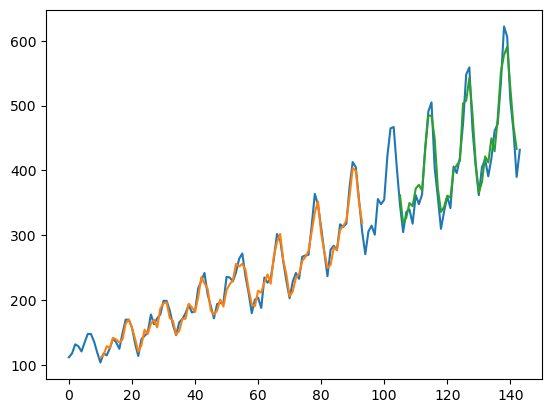

In [18]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()